In [1]:
import pandas as pd
inp_path = "red-wine-quality-cortez-et-al-2009/winequality-red.csv"

df = pd.read_csv(inp_path)

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
%matplotlib inline

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

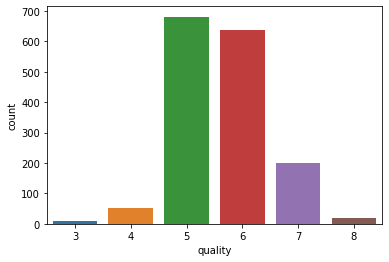

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='quality', data=df)

In [8]:
mydf = df['quality'].value_counts()
mydf

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<BarContainer object of 6 artists>

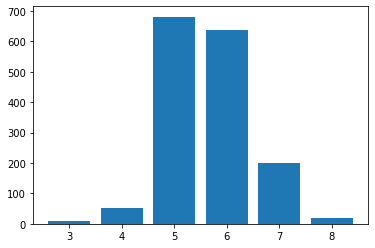

In [9]:
plt.bar(df['quality'].unique(), mydf)

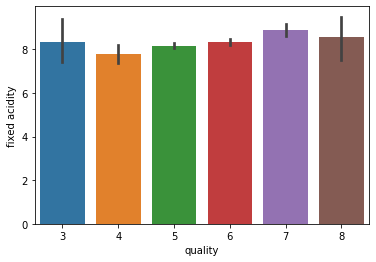

In [10]:
sns.barplot(x='quality', y='fixed acidity', data=df)

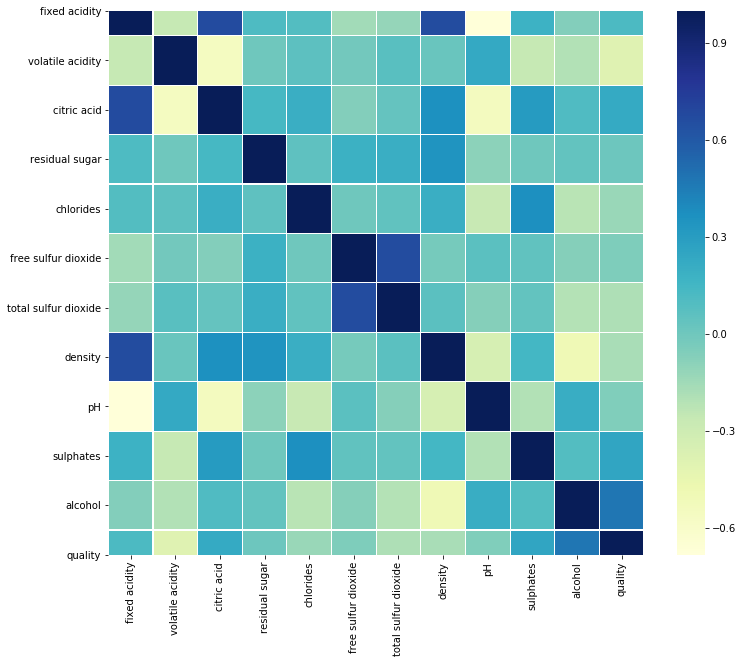

In [11]:
f, ax = plt.subplots(figsize =(12,10)) 
sns.heatmap(df.corr(), ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [12]:
df.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.26,0.67,0.11,0.094,-0.15,-0.11,0.67,-0.68,0.18,-0.062,0.12
volatile acidity,-0.26,1,-0.55,0.0019,0.061,-0.011,0.076,0.022,0.23,-0.26,-0.2,-0.39
citric acid,0.67,-0.55,1,0.14,0.2,-0.061,0.036,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.0019,0.14,1,0.056,0.19,0.2,0.36,-0.086,0.0055,0.042,0.014
chlorides,0.094,0.061,0.2,0.056,1,0.0056,0.047,0.2,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.011,-0.061,0.19,0.0056,1,0.67,-0.022,0.07,0.052,-0.069,-0.051
total sulfur dioxide,-0.11,0.076,0.036,0.2,0.047,0.67,1,0.071,-0.066,0.043,-0.21,-0.19
density,0.67,0.022,0.36,0.36,0.2,-0.022,0.071,1,-0.34,0.15,-0.5,-0.17
pH,-0.68,0.23,-0.54,-0.086,-0.27,0.07,-0.066,-0.34,1,-0.2,0.21,-0.058
sulphates,0.18,-0.26,0.31,0.0055,0.37,0.052,0.043,0.15,-0.2,1,0.094,0.25


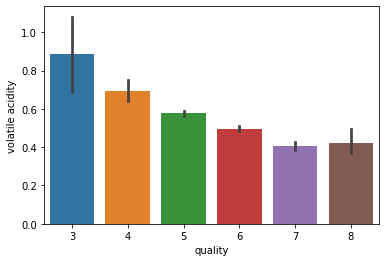

In [13]:
sns.barplot(x='quality', y='volatile acidity', data=df)

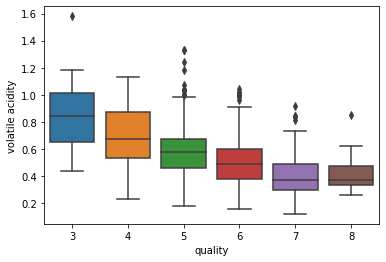

In [14]:
sns.boxplot(x='quality', y='volatile acidity', data=df)

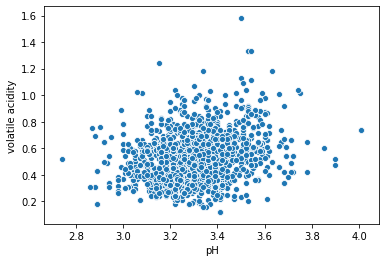

In [15]:
sns.scatterplot(x='pH', y='volatile acidity', data=df)

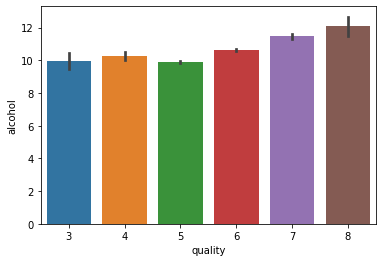

In [16]:
sns.barplot(x='quality', y='alcohol', data=df)

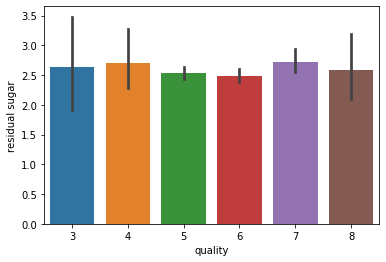

In [17]:
sns.barplot(x='quality', y='residual sugar', data=df)

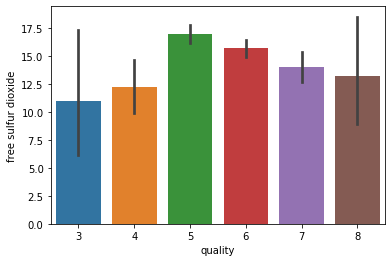

In [18]:
sns.barplot(x='quality', y='free sulfur dioxide', data=df)

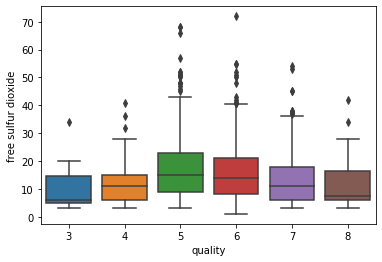

In [19]:
sns.boxplot(x='quality', y='free sulfur dioxide', data=df)

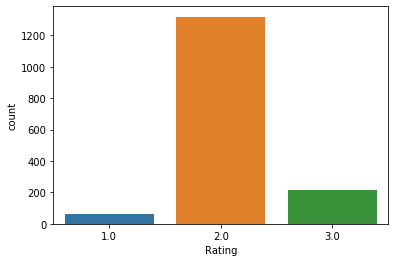

In [20]:
df.loc[df['quality']<=4, 'Rating'] = 1
df.loc[(df['quality']>=5) & (df['quality']<=6), 'Rating'] = 2
df.loc[(df['quality']>=7) & (df['quality']<=8), 'Rating'] = 3
sns.countplot(x='Rating', data=df)

In [21]:
df.drop(columns=['quality'], inplace=True)

In [22]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Rating'],
      dtype='object')

In [23]:
x = df.loc[:, ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides','total sulfur dioxide', 'density', 'sulphates', 'alcohol']]
# x = df.iloc[:, :11]
y = df['Rating']

In [24]:
x.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4


In [25]:
y.head()

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: Rating, dtype: float64

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(x)

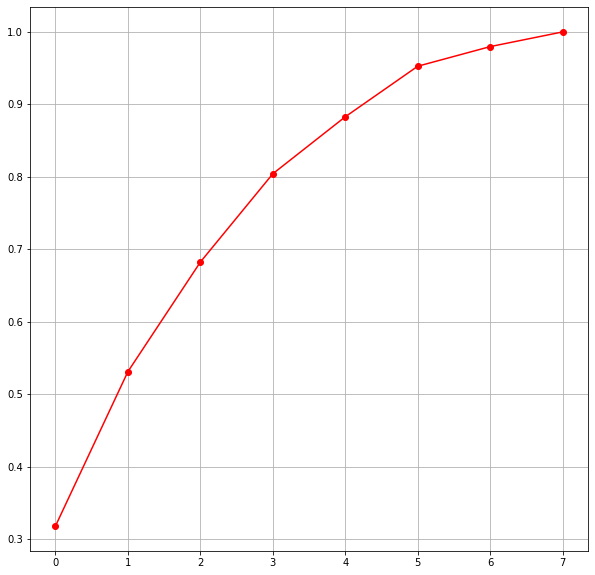

In [28]:
import numpy as np

plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [29]:
pca_new = PCA(n_components=6)
x_new = pca_new.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x_new, y, test_size=0.20)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 6)
(320, 6)
(1279,)
(320,)


In [32]:
accuracy_dict = {}

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

lreg = LogisticRegression()
lreg.fit(x_train, y_train)
lreg_predict = lreg.predict(x_test)

confusion_matrix_lreg = confusion_matrix(y_test, lreg_predict)
accuracy_score_lreg = accuracy_score(y_test, lreg_predict)

In [34]:
confusion_matrix_lreg

array([[  0,  11,   0],
       [  0, 258,  11],
       [  0,  26,  14]], dtype=int64)

In [35]:
accuracy_score_lreg*100

85.0

In [36]:
accuracy_dict['LogisticRegression'] = accuracy_score_lreg*100

In [37]:
print(classification_report(y_test, lreg_predict))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        11
         2.0       0.87      0.96      0.91       269
         3.0       0.56      0.35      0.43        40

    accuracy                           0.85       320
   macro avg       0.48      0.44      0.45       320
weighted avg       0.81      0.85      0.82       320



C:\Users\agilist\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
!pip install imblearn

In [39]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

Using TensorFlow backend.


In [40]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(x_test) 
  
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.10      0.73      0.18        11
         2.0       0.95      0.54      0.69       269
         3.0       0.37      0.82      0.51        40

    accuracy                           0.58       320
   macro avg       0.47      0.70      0.46       320
weighted avg       0.85      0.58      0.65       320



In [41]:
confusion_matrix_lreg_smote = confusion_matrix(y_test, predictions)
accuracy_score_lreg_smote = accuracy_score(y_test, predictions)

In [42]:
confusion_matrix_lreg_smote

array([[  8,   3,   0],
       [ 68, 145,  56],
       [  2,   5,  33]], dtype=int64)

In [43]:
accuracy_score_lreg_smote*100

58.12500000000001

In [44]:
accuracy_dict['LogisticRegression-SMOTE'] = accuracy_score_lreg_smote*100

In [45]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dt_predict = dtree.predict(x_test)

In [46]:
df_conf_matrix = confusion_matrix(y_test, dt_predict)
df_acc_score = accuracy_score(y_test, dt_predict)

In [47]:
df_conf_matrix

array([[  2,   9,   0],
       [  6, 244,  19],
       [  0,  23,  17]], dtype=int64)

In [48]:
df_acc_score*100

82.1875

In [49]:
accuracy_dict['DecisionTrees'] = df_acc_score*100

In [50]:
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

         1.0       0.25      0.18      0.21        11
         2.0       0.88      0.91      0.90       269
         3.0       0.47      0.42      0.45        40

    accuracy                           0.82       320
   macro avg       0.54      0.50      0.52       320
weighted avg       0.81      0.82      0.82       320



In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)

In [52]:
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)

In [53]:
nb_conf_matrix

array([[  2,   9,   0],
       [  2, 255,  12],
       [  0,  21,  19]], dtype=int64)

In [54]:
nb_acc_score*100

86.25

In [55]:
accuracy_dict['NaiveBayes'] = nb_acc_score*100

In [56]:
print(classification_report(y_test, nb_predict))

              precision    recall  f1-score   support

         1.0       0.50      0.18      0.27        11
         2.0       0.89      0.95      0.92       269
         3.0       0.61      0.47      0.54        40

    accuracy                           0.86       320
   macro avg       0.67      0.53      0.57       320
weighted avg       0.85      0.86      0.85       320



In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [58]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)

In [59]:
rf_conf_matrix

array([[  0,  11,   0],
       [  1, 262,   6],
       [  0,  17,  23]], dtype=int64)

In [60]:
rf_acc_score*100

89.0625

In [61]:
accuracy_dict['RandomForest'] = rf_acc_score*100

In [62]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        11
         2.0       0.90      0.97      0.94       269
         3.0       0.79      0.57      0.67        40

    accuracy                           0.89       320
   macro avg       0.57      0.52      0.53       320
weighted avg       0.86      0.89      0.87       320



In [63]:
from sklearn.svm import SVC
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc_predict=lin_svc.predict(x_test)

In [64]:
lin_svc_conf_matrix = confusion_matrix(y_test, lin_svc_predict)
lin_svc_acc_score = accuracy_score(y_test, lin_svc_predict)

In [65]:
lin_svc_conf_matrix

array([[  0,  11,   0],
       [  0, 264,   5],
       [  0,  28,  12]], dtype=int64)

In [66]:
lin_svc_acc_score*100

86.25

In [67]:
accuracy_dict['SVM'] = lin_svc_acc_score*100

In [68]:
print(classification_report(y_test, lin_svc_predict))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        11
         2.0       0.87      0.98      0.92       269
         3.0       0.71      0.30      0.42        40

    accuracy                           0.86       320
   macro avg       0.53      0.43      0.45       320
weighted avg       0.82      0.86      0.83       320



C:\Users\agilist\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_predict = xgb.predict(x_test)

In [70]:
xgb_conf_matrix = confusion_matrix(y_test, xgb_predict)
xgb_acc_score = accuracy_score(y_test, xgb_predict)

In [71]:
xgb_acc_score*100

86.5625

In [72]:
xgb_conf_matrix

array([[  0,  11,   0],
       [  0, 258,  11],
       [  0,  21,  19]], dtype=int64)

In [73]:
accuracy_dict['XGBoost'] = xgb_acc_score*100

In [74]:
for algo, acc in accuracy_dict.items():
    print(algo, '---', round(acc,2),'%')

LogisticRegression --- 85.0 %
LogisticRegression-SMOTE --- 58.13 %
DecisionTrees --- 82.19 %
NaiveBayes --- 86.25 %
RandomForest --- 89.06 %
SVM --- 86.25 %
XGBoost --- 86.56 %


In [75]:
n_estimators_list = [50, 100, 250, 400, 700]
for estimator in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=estimator)
    rf.fit(x_train, y_train)
    rf_predict=rf.predict(x_test)
    rf_conf_matrix = confusion_matrix(y_test, rf_predict)
    rf_acc_score = accuracy_score(y_test, rf_predict)
    print("n_estimators: ", estimator, ' ', rf_acc_score*100, '%')

n_estimators:  50   88.125 %
n_estimators:  100   87.5 %
n_estimators:  250   87.8125 %
n_estimators:  400   87.8125 %
n_estimators:  700   87.5 %


In [76]:
random_state_list = [10,20,30,40,50]
for random_state in random_state_list:
    rf = RandomForestClassifier(n_estimators=100, random_state=random_state)
    rf.fit(x_train, y_train)
    rf_predict=rf.predict(x_test)
    rf_conf_matrix = confusion_matrix(y_test, rf_predict)
    rf_acc_score = accuracy_score(y_test, rf_predict)
    print("n_estimators: 100 random_state: ", random_state, ' ', rf_acc_score*100, '%')

n_estimators: 100 random_state:  10   87.1875 %
n_estimators: 100 random_state:  20   88.125 %
n_estimators: 100 random_state:  30   87.5 %
n_estimators: 100 random_state:  40   87.1875 %
n_estimators: 100 random_state:  50   87.1875 %
